<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Задача-проекта" data-toc-modified-id="Задача-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задача проекта</a></span></li><li><span><a href="#Описание-тарифов" data-toc-modified-id="Описание-тарифов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание тарифов</a></span></li></ul></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

## Описание проекта

### Задача проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
    
**Примечание**.
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

## Изучение данных из файла

In [1]:
import pandas as pd
pd.options.display.max_columns = None # отображать все столбцы без разбиения датафрейма на части
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

calls = pd.read_csv('/datasets/calls.csv', sep=',', decimal='.')
internet = pd.read_csv('/datasets/internet.csv', sep=',', decimal='.')
messages = pd.read_csv('/datasets/messages.csv', sep=',', decimal='.')
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',', decimal='.')
users = pd.read_csv('/datasets/users.csv', sep=',', decimal='.')

display(calls.head())
# calls.info()

display(internet.head())
# internet.info()

display(messages.head())
# messages.info()

display(tariffs.head())
# tariffs.info()

display(users.head())
# users.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Выводы.

- В таблице 'calls' 202607 строк. Пропусков нет. Содержимое столбца 'call_date' необходимо преобразовать методом to_datetime(). Значения в столбце 'duration' округлим до минут в большую сторону, поскольку тарификация поминутная.
- В таблице 'internet' 149396 строк. Пропусков нет. Содержимое столбца 'session_date' необходимо преобразовать методом to_datetime(). Для каждого абонента необходимо посчитать сумму трафика по месяцам (столбец 'mb_used'), перевести в Гб и округлить в большую сторону. Столбцец 'Unnamed: 0' можно удалить, поскольку дублирует столбец с индексами.
- В таблице 'messages' 123036 строк. Пропусков нет. Содержимое столбца 'message_date' необходимо преобразовать методом to_datetime().
- В таблице 'tariffs' 2 строки. Пропусков нет. Предоставляемый в рамках тарифа интернет-трафик необходимо перевести в Гб (столбец 'mb_per_month_included').
- В таблице 'users' 500 строк. В столбце 'churn_date' 462 пропуска. В условиях задачи написано: "если значение пропущено, то тариф ещё действовал на момент выгрузки данных". Содержимое столбцов 'churn_date' и 'reg_date' необходимо преобразовать методом to_datetime().

## Предобработка данных

In [2]:
# Для удобства альнейшей работы значения столбца 'tariff_name' в таблице 'tariffs' сделаем индексами
tariffs.set_index('tariff_name', inplace=True)

In [3]:
# Преобразование типа столбцов с датами в datetime64.
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Определим месяц совершения действий
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [4]:
# Значения в столбце 'duration' округлим до минут в большую сторону, поскольку тарификация поминутная.

# calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x)) # вариант 1
calls['duration'] = np.ceil(calls['duration']).astype('int') # вариант 2

# calls.head()

In [5]:
# Предоставляемый в рамках тарифа интернет-трафик необходимо перевести в Гб
internet['gb_used'] = internet['mb_used'] / 1024
tariffs['gbs_included'] = tariffs['mb_per_month_included'] / 1024

Количество израсходованных минут по месяцам.

In [6]:
calls_pivot = calls.pivot_table(index=['user_id'], columns='month', values='duration', aggfunc='sum')
calls_pivot['unit'] = 'minute'
calls_pivot.head()

# calls_grouped = calls.groupby(['user_id','month']).agg({'duration':'sum'})
# calls_grouped.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,unit
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,minute
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0,minute
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0,minute
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0,minute
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,minute


Объём израсходованного интернет-трафика по месяцам.

In [7]:
internet_pivot = internet.pivot_table(index=['user_id'], columns='month', values='gb_used', aggfunc='sum')
# internet_grouped = internet.groupby(['user_id','month']).agg({'gb_used':'sum'}).reset_index()

# Округлим значения в сводной таблице в большую сторону.
internet_pivot = np.ceil(internet_pivot)
internet_pivot['unit'] = 'gb'

# internet_grouped['gb_used'] = np.ceil(internet_grouped['gb_used']).astype('Int64')

internet_pivot.head()
# internet_grouped.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,unit
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,gb
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0,gb
1002,NaN,NaN,NaN,NaN,NaN,11.0,18.0,20.0,17.0,14.0,19.0,18.0,gb
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,13.0,15.0,12.0,10.0,gb
1004,NaN,NaN,NaN,NaN,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0,gb


Количество отправленных сообщений по месяцам.

In [8]:
messages_pivot = messages.pivot_table(index=['user_id'], columns='month', values='id', aggfunc='count')
messages_pivot['unit'] = 'message'

# messages_grouped = internet.groupby(['user_id','month']).agg({'id':'count'}).reset_index()

messages_pivot.head()
# messages_grouped.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,unit
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,message
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0,message
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0,message
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,message
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0,message


Сводная таблица затрат минут, гигабайт и сообщений по месяцам.

In [9]:
sources_costs = pd.concat([calls_pivot, internet_pivot, messages_pivot], axis=0)
sources_costs = users[['user_id', 'tariff']].join(sources_costs, on='user_id', how='right').reset_index(drop=True)
sources_costs.head(8)

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,unit
0,1000,ultra,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,minute
1,1000,ultra,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,gb
2,1000,ultra,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,message
3,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0,minute
4,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0,gb
5,1002,smart,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0,minute
6,1002,smart,NaN,NaN,NaN,NaN,NaN,11.0,18.0,20.0,17.0,14.0,19.0,18.0,gb
7,1002,smart,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0,message


Затраты пользователей на звонки, интернет и сообщения по месяцам сверх абонентской платы.

In [10]:
add_costs = sources_costs.copy()
number_mounth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Расчёт затрат на звонки, интернет и сообщения в зависимости от тарифа
for tariff in ('smart', 'ultra'):
    for unit in ('minute', 'gb', 'message'):
        add_costs.loc[(add_costs['tariff'] == tariff) & 
                      (add_costs['unit'] == unit), number_mounth] -= tariffs.loc[tariff, f'{unit}s_included']
        add_costs.loc[(add_costs['tariff'] == tariff) & 
                      (add_costs['unit'] == unit), number_mounth] *= tariffs.loc[tariff, f'rub_per_{unit}']

# Обнуление отрицательных значений. Они означают, что пользователь не превысил лимиты тарифа.
add_costs[number_mounth] = add_costs[number_mounth].clip(lower=0)

# Заменим значения в столбце 'unit' на 'rub'
add_costs['unit'] = 'rub'

add_costs.head(8)
# add_costs.info()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,unit
0,1000,ultra,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rub
1,1000,ultra,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rub
2,1000,ultra,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rub
3,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,rub
4,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,0.0,rub
5,1002,smart,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rub
6,1002,smart,NaN,NaN,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0,rub
7,1002,smart,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rub


Затраты пользователей по месяцам сверх абонентской платы.

In [11]:
# При группировке и суммировании данных методом sum() возникает проблема: если в столбце все значения -
# NaN, то сумма получается 0. Мне этого НЕ надо, поскольку у нуля и NaN в таблице разный смысл.
# Пришлось агрегировать данные с помощью специальной функции.

def group_sum(group):
    return group.values.sum()

sum_add_costs = add_costs.groupby('user_id')[number_mounth].agg(group_sum)

# Добавим столбец'tariff'.
sum_add_costs = users[['user_id', 'city', 'tariff']].join(sum_add_costs, on='user_id', how='right')
sum_add_costs.head()

,user_id,city,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,Краснодар,ultra,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,Москва,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,0.0
2,1002,Стерлитамак,smart,NaN,NaN,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
3,1003,Москва,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,1004,Новокузнецк,ultra,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Затраты пользователей по месяцам с учётом абонентской платы.

In [12]:
sum_costs = sum_add_costs.copy()
sum_costs.loc[sum_costs['tariff'] == 'smart', number_mounth] += tariffs.loc['smart', 'rub_monthly_fee']
sum_costs.loc[sum_costs['tariff'] == 'ultra', number_mounth] += tariffs.loc['ultra', 'rub_monthly_fee']
sum_costs.head()

,user_id,city,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,Краснодар,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1001,Москва,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0
2,1002,Стерлитамак,smart,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
3,1003,Москва,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
4,1004,Новокузнецк,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0


## Анализ данных

Определим точечные оценки распределений количества израсходованных минут, гигабайт и сообщений для разных тарифов.

In [13]:
estimates = pd.DataFrame(data=['mean', 'median', 'var', 'std'], columns = ['estimates'])
axs = pd.Series()

for unit in ('minute', 'gb', 'message'):
    for tariff in ('smart', 'ultra'):
        # выборка значений
        axs[f'{tariff}_{unit}s'] = (sources_costs.loc[(sources_costs['tariff'] == tariff) &
                                                      (sources_costs['unit'] == unit), number_mounth]
                                                  .melt())
        # точечные оценки генерального среднего, медианы, дисперсии, среднего квадратичного отклонения
        estimates = estimates.join(
                                   axs[f'{tariff}_{unit}s'].agg({'value': ['mean', 'median', 'var', 'std']})
                                                           .round(1)
                                                           .rename(columns={'value': f'{tariff}_{unit}s'}),
                                   on='estimates', how='right')
        
display(estimates)
# axs['smart_minutes'].head()

,estimates,smart_minutes,ultra_minutes,smart_gbs,ultra_gbs,smart_messages,ultra_messages
0,mean,419.1,545.5,16.3,19.7,38.7,61.2
1,median,423.0,528.0,17.0,19.0,34.0,51.0
2,var,35844.2,94203.4,32.9,94.1,717.6,2109.7
3,std,189.3,306.9,5.7,9.7,26.8,45.9


Построим гистограммы распределений количества израсходованных минут, гигабайт и сообщений для разных тарифов.

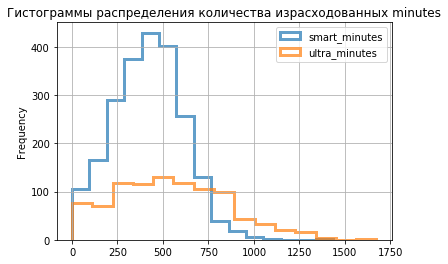

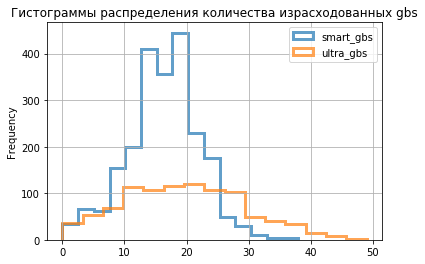

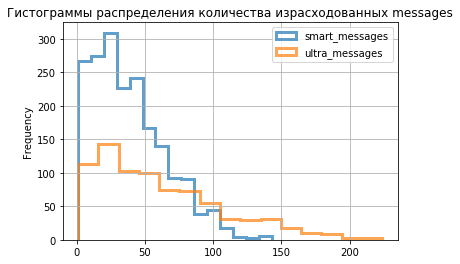

In [14]:
for unit in ('minute', 'gb', 'message'):
    ax = axs[f'smart_{unit}s'].plot(
                                    kind='hist',
                                    y='value',
                                    histtype='step',
                                   #range=(0, 500),
                                    bins=15,
                                    linewidth=3,
                                    alpha=0.7,
                                    label=f'smart_{unit}s',
                                    )
    axs[f'ultra_{unit}s'].plot(
                                    kind='hist',
                                    y='value',
                                    histtype='step',
                                   #range=(0, 500),
                                    bins=15,
                                    linewidth=3,
                                    alpha=0.7,
                                    label=f'ultra_{unit}s',
                                    ax=ax,
                                    grid=True,
                                    legend=True,
                                    title=f'Гистограммы распределения количества израсходованных {unit}s'
                                  )

Оценим вероятность абонента превысить лимит по каждому виду услуги.

In [15]:
for unit in ('minute', 'gb', 'message'):
    print(f'Оценка вероятностей превысить лимит {unit}s:')
    for tariff in ('smart', 'ultra'):
        prob_lim = sum(axs[f'{tariff}_{unit}s']['value'] > tariffs.loc[tariff, f'{unit}s_included']) / sum(~axs[f'{tariff}_{unit}s']['value'].isna())
        print(f'- тарифа {tariff}: {prob_lim:.0%}')
# sum(axs['smart_minutes']['value'] != np.nan)
# axs['smart_minutes'].info()
# axs['smart_minutes']['value'].isna()

Оценка вероятностей превысить лимит minutes:
- тарифа smart: 34%
- тарифа ultra: 0%
Оценка вероятностей превысить лимит gbs:
- тарифа smart: 59%
- тарифа ultra: 14%
Оценка вероятностей превысить лимит messages:
- тарифа smart: 29%
- тарифа ultra: 0%


Выводы.
- Точечные оценки характеристик распределений для тарифа 'ultra' ожидаемо больше соответствующих показателей для тарифа 'smart'. Абоненты тарифа 'ultra' тратят больше минут, Гб и сообщений в среднем на 30, 21 и 58% соответственно. Несмотря на это, вероятности превысить лимиты абонентами тарифа 'ultra' значительно меньше из-за большого "пакета" минут, Гб и сообщений, предоставляемого в рамках тарифа.
- Гистограммы распределения израсходованных минут и Гб напоминают нормальное распределение. Гистограммы отправленных сообщений (sms) по форме больше напоминают эспоненциальное распределение, а не нормальное, из-за явно выраженных "хвостов" справа. Правосторонняя ассиметрия распределения приводит к расхождению среднего и медианного значения. Для тарифа 'ultra' средее значение отправленных сообщений 61,2, а медианное только 51. 

## Проверка гипотез

In [16]:
# Cредняя выручка пользователей тарифа «Смарт»
proceeds_smart = (sum_costs.loc[sum_costs['tariff'] == 'smart', number_mounth]
                            .melt()
                            .dropna()
                            .loc[:,'value']
                  )

# Cредняя выручка пользователей тарифа «Ультра»
proceeds_ultra = (sum_costs.loc[sum_costs['tariff'] == 'ultra', number_mounth]
                            .melt()
                            .dropna()
                            .loc[:,'value']
                  )

print('Оценка средней выручки пользователей тарифа «Смарт»:', proceeds_smart.agg({'value': 'mean'}).loc['value'].round(2), 'руб.')
print('Оценка средней выручки пользователей тарифа «Ультра»:', proceeds_ultra.agg({'value': 'mean'}).loc['value'].round(2), 'руб.\n')

# Проверим гипотезу о равенстве средних двух генеральных совокупностей

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(proceeds_smart, proceeds_ultra, equal_var=False)

print('''Проверим гипотезу о равенстве средних двух генеральных совокупностей. 
Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одна и та же.
Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» разная. \n''')
print('p-значение:', results.pvalue, '\n')

if results.pvalue < alpha:
    print('''Вывод: отвергаем нулевую гипотезу. Полученное значение p-value указывает вероятность 
получить случайно полученную или бОльшую разницу в значениях средней выручки пользователей тарифов 
«Ультра» и «Смарт». Эта вероятность близка к нулю.''')

else:
    print('Вывод: не получилось отвергнуть нулевую гипотезу.')

Оценка средней выручки пользователей тарифа «Смарт»: 1296.37 руб.
Оценка средней выручки пользователей тарифа «Ультра»: 2070.89 руб.

Проверим гипотезу о равенстве средних двух генеральных совокупностей. 
Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одна и та же.
Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» разная. 

p-значение: 2.89194250205224e-244 

Вывод: отвергаем нулевую гипотезу. Полученное значение p-value указывает вероятность 
получить случайно полученную или бОльшую разницу в значениях средней выручки пользователей тарифов 
«Ультра» и «Смарт». Эта вероятность близка к нулю.


In [17]:
# Cредняя выручка пользователей из Москвы
proceeds_mosсow = (sum_costs.loc[sum_costs['city'] == 'Москва', number_mounth]
                            .melt()
                            .dropna()
                            .loc[:,'value']
                  )

# Cредняя выручка пользователей не из Москвы
proceeds_not_mosсow = (sum_costs.loc[sum_costs['city'] != 'Москва', number_mounth]
                                .melt()
                                .dropna()
                                .loc[:,'value']
                  )

print('Оценка средней выручки пользователей из Москвы:', proceeds_mosсow.agg({'value': 'mean'}).loc['value'].round(2), 'руб.')
print('Оценка средней выручки пользователей не из Москвы:', proceeds_not_mosсow.agg({'value': 'mean'}).loc['value'].round(2), 'руб.\n')

# Проверим гипотезу о равенстве средних двух генеральных совокупностей

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(proceeds_mosсow, proceeds_not_mosсow, equal_var=False)

print('''Проверим гипотезу о равенстве средних двух генеральных совокупностей. 
Нулевая гипотеза: средняя выручка пользователей из Москвы и других регионов одна и та же.
Альтернативная гипотеза: средняя выручка пользователей из Москвы и других регионов разная. \n''')
print('p-значение:', results.pvalue, '\n')

if results.pvalue < alpha:
    print('Вывод: отвергаем нулевую гипотезу.')
else:
    print('Вывод: не получилось отвергнуть нулевую гипотезу.')
    print(f'''Полученное значение p-value говорит о том, что с вероятностью {results.pvalue:.0%} текущее или бОльшее различие в
средней выручке пользовтелей Москвы и других регионов можно получить случайно. Это слишком большая 
вероятность. Разница в средней выручке незначима.''')

Оценка средней выручки пользователей из Москвы: 1554.28 руб.
Оценка средней выручки пользователей не из Москвы: 1529.69 руб.

Проверим гипотезу о равенстве средних двух генеральных совокупностей. 
Нулевая гипотеза: средняя выручка пользователей из Москвы и других регионов одна и та же.
Альтернативная гипотеза: средняя выручка пользователей из Москвы и других регионов разная. 

p-значение: 0.47486712986624957 

Вывод: не получилось отвергнуть нулевую гипотезу.
Полученное значение p-value говорит о том, что с вероятностью 47% текущее или бОльшее различие в
средней выручке пользовтелей Москвы и других регионов можно получить случайно. Это слишком большая 
вероятность. Разница в средней выручке незначима.


## Общий вывод

Оценки средней выручки для пользователей тарифов «Смарт» и «Ультра» равны 1296.37 и 2070.89 руб. соответственно.

- Для телеком-компании «Мегалайн» выгоднее подключать клиентов к тарифу «Ультра».
- Клиенту выгоднее подключаться к тарифу «Смарт». Вероятности превысить лимиты по количеству минут, Гб и сообщений приблизительно равны 34%, 59%, 29% соответственно. Несомтря на это, средние затраты на услуги меньше у пользователей тарифа «Смарт».